In [1]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import os

np.random.seed(813306)

In [2]:
def build_resnet(input_shape, n_feature_maps, nb_classes):
    print ('build conv_x')
    x = keras.layers.Input(shape=(input_shape))
    conv_x = keras.layers.BatchNormalization()(x)
    conv_x = keras.layers.Conv2D(n_feature_maps, 8, 1, padding='same')(conv_x)
    conv_x = keras.layers.BatchNormalization()(conv_x)
    conv_x = keras.layers.Activation('relu')(conv_x)
     
    print ('build conv_y')
    conv_y = keras.layers.Conv2D(n_feature_maps, 5, 1, padding='same')(conv_x)
    conv_y = keras.layers.BatchNormalization()(conv_y)
    conv_y = keras.layers.Activation('relu')(conv_y)
     
    print ('build conv_z')
    conv_z = keras.layers.Conv2D(n_feature_maps, 3, 1, padding='same')(conv_y)
    conv_z = keras.layers.BatchNormalization()(conv_z)
     
    is_expand_channels = not (input_shape[-1] == n_feature_maps)  # 不相等返回True
    if is_expand_channels:
        shortcut_y = keras.layers.Conv2D(n_feature_maps, 1, 1,padding='same')(x)
        shortcut_y = keras.layers.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = keras.layers.BatchNormalization()(x)
    print ('Merging skip connection')
    y = keras.layers.Add()([shortcut_y, conv_z])
    y = keras.layers.Activation('relu')(y)
     
    print ('build conv_x')
    x1 = y
    conv_x = keras.layers.Conv2D(n_feature_maps*2, 8, 1, padding='same')(x1)
    conv_x = keras.layers.BatchNormalization()(conv_x)
    conv_x = keras.layers.Activation('relu')(conv_x)
     
    print ('build conv_y')
    conv_y = keras.layers.Conv2D(n_feature_maps*2, 5, 1, padding='same')(conv_x)
    conv_y = keras.layers.BatchNormalization()(conv_y)
    conv_y = keras.layers.Activation('relu')(conv_y)
     
    print ('build conv_z')
    conv_z = keras.layers.Conv2D(n_feature_maps*2, 3, 1, padding='same')(conv_y)
    conv_z = keras.layers.BatchNormalization()(conv_z)
     
    is_expand_channels = not (input_shape[-1] == n_feature_maps*2)
    if is_expand_channels:
        shortcut_y = keras.layers.Conv2D(n_feature_maps*2, 1, 1,padding='same')(x1)
        shortcut_y = keras.layers.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = keras.layers.BatchNormalization()(x1)
    print ('Merging skip connection')
    y = keras.layers.Add()([shortcut_y, conv_z])
    y = keras.layers.Activation('relu')(y)
     
    print ('build conv_x')
    x1 = y
    conv_x = keras.layers.Conv2D(n_feature_maps*2, 8, 1, padding='same')(x1)
    conv_x = keras.layers.BatchNormalization()(conv_x)
    conv_x = keras.layers.Activation('relu')(conv_x)
     
    print ('build conv_y')
    conv_y = keras.layers.Conv2D(n_feature_maps*2, 5, 1, padding='same')(conv_x)
    conv_y = keras.layers.BatchNormalization()(conv_y)
    conv_y = keras.layers.Activation('relu')(conv_y)
     
    print ('build conv_z')
    conv_z = keras.layers.Conv2D(n_feature_maps*2, 3, 1, padding='same')(conv_y)
    conv_z = keras.layers.BatchNormalization()(conv_z)

    is_expand_channels = not (input_shape[-1] == n_feature_maps*2)
    if is_expand_channels:
        shortcut_y = keras.layers.Conv2D(n_feature_maps*2, 1, 1,padding='same')(x1)
        shortcut_y = keras.layers.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = keras.layers.BatchNormalization()(x1)
    print ('Merging skip connection')
    y = keras.layers.Add()([shortcut_y, conv_z])
    y = keras.layers.Activation('relu')(y)

    full = keras.layers.GlobalAveragePooling2D()(y)
    out = keras.layers.Dense(nb_classes, activation='softmax')(full)
    print ('        -- model was built.')
    return x, out

In [3]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter = ',')
    Y = data[:,0]
    X = data[:,1:]
    return X, Y
   
# nb_epochs = 10
nb_epochs = 20

In [4]:
# 导入训练集
# train_path = r"F:\zwy\20200429期末考试数据集\dataset\train"
train_path = r'D:\研一下\临时文件\20200429期末考试数据集\dataset\train'
label_files= os.listdir(train_path) #得到文件夹下的所有文件名称
print(label_files)
#def load_train():
train = []
print('Read train datasets')
for j in label_files:   
    path = os.path.join(train_path,str(j))
    print(path)
    txt_files = os.listdir(path)  
    for fl in txt_files:
        txt_path = os.path.join(path,str(fl))
        print(txt_path)
        train.append(int(j[5:]))   
        file_object = open(txt_path,'rU')
        try:
            for line in file_object: 
                line=line.replace("\\n", ",")
                line=line.split(",")
                for num in line:
                    train.append(float(num))
        finally:
            file_object.close()                 
train = np.array(train)
train = train.reshape(-1,601)
np.random.shuffle(train)
print(train.shape)
print(train)

['label1', 'label10', 'label11', 'label12', 'label2', 'label3', 'label4', 'label5', 'label6', 'label7', 'label8', 'label9']
Read train datasets
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_001.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_002.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_003.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_004.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_005.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_006.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_007.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_008.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_009.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_010.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_011.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_012.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_013.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\trai

D:\Python\Anaconda3-5.0.1-Windows-x86_64\envs\tf2\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 'U' mode is deprecated


D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_069.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_070.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_071.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_072.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_073.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_074.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_075.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_076.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_077.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_078.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_079.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_080.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_081.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_082.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_083.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_084.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_085.t

D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label11\11_027.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label11\11_028.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label11\11_029.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label11\11_030.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label11\11_031.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label11\11_032.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label11\11_033.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label11\11_034.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label11\11_035.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label11\11_036.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label11\11_037.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label11\11_038.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label11\11_039.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label11\11_040.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label11\11_041.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label11\11_042.txt
D:\研一下\临时文件\20200429期末考试

D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_075.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_076.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_077.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_078.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_079.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_080.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_081.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_082.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_083.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_084.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_085.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_086.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_087.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_088.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_089.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_090.txt
D:\研一下\临时文件\20200429期末考试

D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label3\3_048.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label3\3_049.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label3\3_050.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label3\3_051.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label3\3_052.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label3\3_053.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label3\3_054.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label3\3_055.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label3\3_056.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label3\3_057.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label3\3_058.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label3\3_059.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label3\3_060.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label3\3_061.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label3\3_062.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label3\3_063.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label3\3_064.t

D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_004.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_005.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_006.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_007.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_008.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_009.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_010.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_011.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_012.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_013.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_014.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_015.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_016.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_017.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_018.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_019.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_020.t

D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_060.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_061.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_062.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_063.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_064.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_065.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_066.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_067.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_068.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_069.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_070.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_071.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_072.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_073.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_074.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_075.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_076.t

D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label7\7_104.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label7\7_105.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label7\7_106.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_001.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_002.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_003.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_004.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_005.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_006.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_007.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_008.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_009.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_010.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_011.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_012.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_013.txt
D:\研一下\

(1198, 601)
[[1.1000e+01 7.9036e-02 8.3311e-02 ... 9.8000e-05 6.0000e-06 6.0000e-05]
 [8.0000e+00 7.5184e-02 7.0221e-02 ... 2.3000e-05 3.2000e-05 5.8000e-05]
 [5.0000e+00 6.9395e-02 3.6165e-02 ... 1.3000e-05 7.8000e-05 7.3000e-05]
 ...
 [2.0000e+00 5.4451e-02 3.4275e-02 ... 7.0000e-06 2.3000e-05 9.6000e-05]
 [9.0000e+00 6.0537e-02 4.5038e-02 ... 5.9000e-05 6.3000e-05 6.0000e-06]
 [5.0000e+00 7.1696e-02 7.0864e-02 ... 6.6000e-05 1.6000e-05 4.0000e-05]]


In [5]:
# 导入验证集
test_path = r"D:\研一下\临时文件\20200429期末考试数据集\dataset\val"
label_files= os.listdir(test_path) #得到文件夹下的所有文件名称
print(label_files)
#def load_train():
test = []
print('Read val datasets')
for j in label_files:   
    path = os.path.join(test_path,str(j))
    print(path)
    txt_files = os.listdir(path)  
    for fl in txt_files:
        txt_path = os.path.join(path,str(fl))
        print(txt_path)
        test.append(int(j[5:]))   
        file_object = open(txt_path,'rU')
        try:
            for line in file_object: 
                line=line.replace("\\n", ",")
                line=line.split(",")
                for num in line:
                    test.append(float(num))
        finally:
            file_object.close()                 
test = np.array(test)
test = test.reshape(-1,601)
np.random.shuffle(test)

total=np.append(train,test)
total= total.reshape(-1,601)
x_total=total[:,1:]
print(test.shape)
print(test)

['label1', 'label10', 'label11', 'label12', 'label2', 'label3', 'label4', 'label5', 'label6', 'label7', 'label8', 'label9']
Read val datasets
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label1
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label1\1_001.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label1\1_002.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label1\1_003.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label1\1_004.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label1\1_005.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label1\1_006.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label1\1_007.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label1\1_008.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label1\1_009.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label10
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label10\10_001.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label10\10_002.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label10\10_003.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label10\10_004.txt
D:\研一下\临时文件\20

D:\Python\Anaconda3-5.0.1-Windows-x86_64\envs\tf2\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 'U' mode is deprecated
  app.launch_new_instance()



D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label4\4_011.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label4\4_012.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label5
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label5\5_001.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label5\5_002.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label5\5_003.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label5\5_004.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label5\5_005.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label5\5_006.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label5\5_007.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label5\5_008.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label5\5_009.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label6
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label6\6_001.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label6\6_002.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label6\6_003.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label6\6_004.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label6\6_0

In [6]:
y_train,x_train = train[:,0],train[:,1:]
y_test,x_test = test[:,0],test[:,1:]
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

nb_classes = len(np.unique(y_test))
batch_size = min(x_train.shape[0]/10, 16)
print(y_test)
print(nb_classes)

y_train = (y_train - y_train.min())/(y_train.max()-y_train.min())*(nb_classes-1)   # y归一化  0，nb_classes-1
y_test = (y_test - y_test.min())/(y_test.max()-y_test.min())*(nb_classes-1)

Y_train = keras.utils.to_categorical(y_train, nb_classes)   # 转为one-hot形式
Y_test = keras.utils.to_categorical(y_test, nb_classes)

# x进行归一化
x_train_mean = x_train.mean()
x_train_std = x_train.std()
x_train = (x_train - x_train_mean)/(x_train_std)

x_test = (x_test - x_train_mean)/(x_train_std)
print(x_test.shape)
x_train = x_train.reshape(x_train.shape + (1,1,))
x_test = x_test.reshape(x_test.shape + (1,1,))
print('x_test.shape = ', x_test.shape)
print('x_train.shape = ', x_train.shape)

x , y = build_resnet(x_train.shape[1:], 64, nb_classes)
print("x=",x_train.shape[1:])

(1198, 600) (1198,)
(100, 600) (100,)
[ 9. 12. 12. 12.  2.  4.  3.  1.  4.  7.  6. 12.  1.  2. 10.  4.  7.  1.
  7.  5. 12.  4.  7.  3.  3.  2.  5.  8.  7.  5.  5.  9.  9.  6.  4.  4.
  8.  4.  6.  6.  2.  5.  9.  3.  6. 11. 12.  9.  1.  3.  5. 10.  3.  2.
  2.  4.  5.  3.  9.  9.  2.  7.  1.  2.  7. 11.  8.  3.  6. 10. 10.  1.
  6. 10.  2.  3. 11. 12.  1.  2.  1. 10.  2.  5.  4. 10.  4.  4.  3.  3.
  2.  3. 12.  7.  4.  9.  7. 12.  5.  1.]
12
(100, 600)
x_test.shape =  (100, 600, 1, 1)
x_train.shape =  (1198, 600, 1, 1)
build conv_x
build conv_y
build conv_z
Merging skip connection
build conv_x
build conv_y
build conv_z
Merging skip connection
build conv_x
build conv_y
build conv_z
Merging skip connection
        -- model was built.
x= (600, 1, 1)


In [69]:
model = keras.models.Model(inputs=x, outputs=y)
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5,
                  patience=50, min_lr=0.0001) 
hist = model.fit(x_train, Y_train, batch_size=batch_size, nb_epoch=nb_epochs,
          verbose=1, validation_data=(x_test, Y_test), callbacks = [reduce_lr])
log = pd.DataFrame(hist.history)
print(log.loc[log['loss'].idxmin]['loss'])
# 保存模型
model.save('ResNet_exam.h5')

Train on 1198 samples, validate on 100 samples
Epoch 1/20
1198/1198 [==============================] - 160s 133ms/sample - loss: 1.5922 - accuracy: 0.5426 - val_loss: 2.8050 - val_accuracy: 0.0700
Epoch 2/20
1198/1198 [==============================] - 164s 137ms/sample - loss: 1.0266 - accuracy: 0.7471 - val_loss: 7.5659 - val_accuracy: 0.0700
Epoch 3/20
1198/1198 [==============================] - 163s 136ms/sample - loss: 0.6843 - accuracy: 0.8464 - val_loss: 4.1684 - val_accuracy: 0.0700
Epoch 4/20
1198/1198 [==============================] - 162s 136ms/sample - loss: 0.5744 - accuracy: 0.8689 - val_loss: 6.0285 - val_accuracy: 0.1900
Epoch 5/20
1198/1198 [==============================] - 159s 133ms/sample - loss: 0.4185 - accuracy: 0.9165 - val_loss: 3.5302 - val_accuracy: 0.2000
Epoch 6/20
1198/1198 [==============================] - 141s 118ms/sample - loss: 0.3534 - accuracy: 0.9324 - val_loss: 2.1487 - val_accuracy: 0.3800
Epoch 7/20
1198/1198 [==============================]

In [70]:
#加载模型
model=keras.models.load_model('ResNet_exam.h5')
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5,
                  patience=50, min_lr=0.0001) 
hist = model.fit(x_train, Y_train, batch_size=batch_size, nb_epoch=nb_epochs,
          verbose=1, validation_data=(x_test, Y_test), callbacks = [reduce_lr])
log = pd.DataFrame(hist.history)
print(log.loc[log['loss'].idxmin]['loss'])
# 保存模型
model.save('ResNet_exam1.h5')

Train on 1198 samples, validate on 100 samples
Epoch 1/20
1198/1198 [==============================] - 157s 131ms/sample - loss: 0.1304 - accuracy: 0.9691 - val_loss: 0.5817 - val_accuracy: 0.7600
Epoch 2/20
1198/1198 [==============================] - 149s 124ms/sample - loss: 0.0930 - accuracy: 0.9783 - val_loss: 0.2850 - val_accuracy: 0.9100
Epoch 3/20
1198/1198 [==============================] - 146s 122ms/sample - loss: 0.1149 - accuracy: 0.9683 - val_loss: 0.5939 - val_accuracy: 0.8800
Epoch 4/20
1198/1198 [==============================] - 148s 123ms/sample - loss: 0.0879 - accuracy: 0.9825 - val_loss: 0.2287 - val_accuracy: 0.9300
Epoch 5/20
1198/1198 [==============================] - 149s 125ms/sample - loss: 0.0930 - accuracy: 0.9808 - val_loss: 3.7723 - val_accuracy: 0.2900
Epoch 6/20
1198/1198 [==============================] - 147s 123ms/sample - loss: 0.0815 - accuracy: 0.9841 - val_loss: 0.3396 - val_accuracy: 0.9100
Epoch 7/20
1198/1198 [==============================]

        loss  accuracy  val_loss  val_accuracy     lr
0   1.662392  0.515860  2.931739          0.15  0.001
1   1.016224  0.769616  5.398622          0.07  0.001
2   0.693720  0.866444  4.829895          0.08  0.001
3   0.525496  0.895659  6.205857          0.07  0.001
4   0.382024  0.930718  3.901615          0.11  0.001
5   0.339269  0.928214  1.321751          0.52  0.001
6   0.292114  0.928214  0.792812          0.66  0.001
7   0.261299  0.943239  0.655792          0.70  0.001
8   0.210513  0.962437  0.746212          0.77  0.001
9   0.189268  0.956594  0.883085          0.74  0.001
10  0.187052  0.955760  0.315393          0.90  0.001
11  0.162249  0.961603  0.599658          0.82  0.001
12  0.152208  0.964942  1.141388          0.69  0.001
13  0.149821  0.965776  0.243636          0.92  0.001
14  0.172675  0.958264  0.379957          0.88  0.001
15  0.127630  0.969950  0.238509          0.92  0.001
16  0.120948  0.975793  0.138989          0.96  0.001
17  0.098988  0.979967  0.21

Text(0, 0.5, 'accuracy')

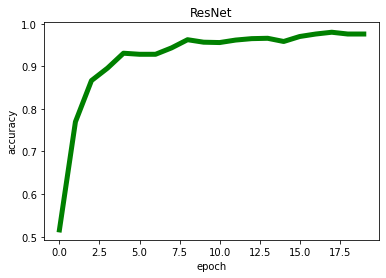

In [20]:
#画图loss acc
print(log)
loss = log['accuracy']
print(range(len(loss)))
print(loss)
plt.plot(range(len(loss)),loss,'-g',linewidth=5)
plt.title('ResNet')
plt.xlabel('epoch')
plt.ylabel('accuracy')

加载测试集
(1298, 200)
(1298, 200)
(1298, 200)
Read train datasets


D:\Python\Anaconda3-5.0.1-Windows-x86_64\envs\tf2\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: 'U' mode is deprecated


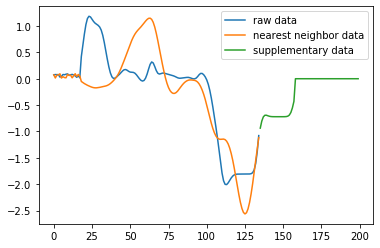

D:\Python\Anaconda3-5.0.1-Windows-x86_64\envs\tf2\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: 'U' mode is deprecated


(300, 600)
[0, 1, 10, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 11, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 12, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 13, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 14, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 15, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 16, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 17, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 2, 20, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 21, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 23, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 24, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 25, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 26, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 27, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 28, 280

In [11]:
print('加载测试集')
import matplotlib.pyplot as plt
x_total1 = x_total[:, 0:200]
x_total2 = x_total[:, 200:400]
x_total3 = x_total[:, 400:]
print(x_total1.shape)
print(x_total2.shape)
print(x_total3.shape)
# test_path = r"F:\zwy\20200429期末考试数据集\dataset\test"
test_path = r"D:\研一下\临时文件\20200429期末考试数据集\dataset\test"
txt_files = os.listdir(test_path)  # 得到文件夹下的所有文件名称
# print(label_files)
# def load_train():
test = []
cur=[]
curtest = []
curcol = []
txt_name_list=[]
txt_name=[]
d=1
dd=1
print('Read train datasets')
for fl in txt_files:
    txt_path = os.path.join(test_path, str(fl))
    txt_name_list.append(int(fl[4:-4]))
    txt_name.append(str(fl))
    file_object = open(txt_path, 'rU')
    try:
        for contxt in file_object:
            line = contxt.split("\\n")
            for curline in line:      # 当前一行
                nums = curline.split(",")
                for num in nums:
                    cur.append(float(num))
                # 计算距离
                curtest = np.tile(cur, (1298, 1))
                if d==1:
                    distant = np.sqrt(np.sum(np.square(x_total1[:,:curtest.shape[1]]-curtest),axis=1))
                if d==2:
                    distant = np.sqrt(np.sum(np.square(x_total2[:,:curtest.shape[1]]-curtest),axis=1))
                if d==3:
                    distant = np.sqrt(np.sum(np.square(x_total3[:,:curtest.shape[1]]-curtest),axis=1))
                # 距离排序
                minindex = np.argmin(distant)
                # 补全序列
                if d==1:
                    curcol = np.append(cur, x_total1[minindex, len(cur):])
                    d+=1

                    if dd==600:
                        fig = plt.figure()
                        plt.plot(range(0,len(cur)), cur)
                        plt.plot(range(0, len(cur)), x_total1[minindex,0:len(cur)])
                        plt.plot(range(len(cur), 200), x_total1[minindex,len(cur):])
                        # plt.plot(range(0,200),x_total1[minindex])
                        plt.legend(['raw data', 'nearest neighbor data','supplementary data'], loc='upper right')

                        plt.show()
                    dd+=1
                if d==2:
                    curcol = np.append(cur, x_total2[minindex, len(cur):])
                    d+=1
                if d==3:
                    curcol = np.append(cur, x_total3[minindex, len(cur):])
                    d=1
                test.append(curcol)
                # 清空cur
                cur = []
    finally:
        file_object.close()
test = np.array(test)
test = test.reshape(-1,600)
print(test.shape)
print(txt_name_list)
# print(test)

In [12]:
# y_train,x_train = train[:,0],train[:,1:]
x_test = test[:]
print(x_test.shape,y_test.shape)

nb_classes = len(np.unique(y_test))
batch_size = min(x_test.shape[0]/10, 16)
print(y_test)
print(nb_classes)

# y_train = (y_train - y_train.min())/(y_train.max()-y_train.min())*(nb_classes-1)   # y归一化  0，nb_classes-1
y_test = (y_test - y_test.min())/(y_test.max()-y_test.min())*(nb_classes-1)

# Y_train = keras.utils.to_categorical(y_train, nb_classes)   # 转为one-hot形式
# Y_test = keras.utils.to_categorical(y_test, nb_classes)

# x进行归一化
x_train_mean = x_train.mean()
x_train_std = x_train.std()
# x_train = (x_train - x_train_mean)/(x_train_std)

x_test = (x_test - x_train_mean)/(x_train_std)
print(x_test.shape)
# x_train = x_train.reshape(x_train.shape + (1,1,))
x_test = x_test.reshape(x_test.shape + (1,1,))
print('x_test.shape = ', x_test.shape)
# print('x_train.shape = ', x_train.shape)

x , y = build_resnet(x_train.shape[1:], 64, nb_classes)
# print("x=",x_train.shape[1:])

(300, 600) (100,)
[ 8. 11. 11. 11.  1.  3.  2.  0.  3.  6.  5. 11.  0.  1.  9.  3.  6.  0.
  6.  4. 11.  3.  6.  2.  2.  1.  4.  7.  6.  4.  4.  8.  8.  5.  3.  3.
  7.  3.  5.  5.  1.  4.  8.  2.  5. 10. 11.  8.  0.  2.  4.  9.  2.  1.
  1.  3.  4.  2.  8.  8.  1.  6.  0.  1.  6. 10.  7.  2.  5.  9.  9.  0.
  5.  9.  1.  2. 10. 11.  0.  1.  0.  9.  1.  4.  3.  9.  3.  3.  2.  2.
  1.  2. 11.  6.  3.  8.  6. 11.  4.  0.]
12
(300, 600)
x_test.shape =  (300, 600, 1, 1)
build conv_x
build conv_y
build conv_z
Merging skip connection
build conv_x
build conv_y
build conv_z
Merging skip connection
build conv_x
build conv_y
build conv_z
Merging skip connection
        -- model was built.


In [13]:
model=keras.models.load_model('ResNet_exam.h5')
print(model.summary())
prediction = model.predict(x_test)
prediction_index = np.argmax(prediction,1)+1  # 找到最大概率所在索引
# prediction = keras.utils.to_categorical(prediction_index, prediction.shape[1])  # 转化为one-hot形式
print(prediction_index)
# print(y_test)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 600, 1, 1)]  0                                            
__________________________________________________________________________________________________
batch_normalization_156 (BatchN (None, 600, 1, 1)    4           input_13[0][0]                   
__________________________________________________________________________________________________
conv2d_144 (Conv2D)             (None, 600, 1, 64)   4160        batch_normalization_156[0][0]    
__________________________________________________________________________________________________
batch_normalization_157 (BatchN (None, 600, 1, 64)   256         conv2d_144[0][0]                 
____________________________________________________________________________________________

[ 6  4  9 10  7 10  1  9  3  5  1  9 10  6  2  8  6  8  9  6  4 11  3  9
  1  5  1  8  1  5  1  6  1  6 12  2  5  8  2  9  3  9  8  2  7 12  1  4
  9  9  2 10 11  9  2 11  2  5  3 10  8 12  2 10  4  7  4 10  6  1  9  3
  7 10  4  8  2  6 11 10  8  2  4  3  5 10 12  6 12 10  7  6  9  4  3  8
  1  8  7 10 11  3  6  5  1 11  1  4  1  1 10  2 12  4 11 10  2 10 12  7
  2 11 10  1  2  7  2 10  1 11 11  1  8  6  3  1  2  4 12  2  2  8 11  5
 12 10  8  2  1  1  5  3  8  4  1  2  2 10  1 12 11  1  4 12  3  2  2 11
 11  7 12  3  5  4 10  2  4  7  2  2  6  3  8  4 10  6 11  2  5 11  8  5
  5  6  9  4  9  5  7 11  1  2 10  6  7  1  6 10  2 12  7 10  7  1  9  6
  1  3  5  2 10  7  3 10  1 10  7  1  4  4  6  9 10  2  9  2  3  2  7  8
  2  2  5  5  8  1  3  9  9  3  5  6 10  7  5  4  2  8 12  4  4 11  2 12
  8  8 11  5  3  2 12  6  8 10  8  3  1  8  3  8 10  5  2 11  7 12  9  9
  2  3 12  2 12  4  1  3  7  1  2  3]


In [14]:
# 保存预测结果到TXT

print(prediction_index)
result_path = r'C:\Users\zwy\Desktop\模型加shuffle\ResNet_result_test.txt'
result_txt=open(result_path,'w')

for n in range(0,300):
#     print(n)
    des=txt_name_list.index(n)
    
#     result_txt.write(str(txt_name_list[des]))
#     result_txt.write('  ')
    print(txt_name[des])
    result_txt.write(str(prediction_index[des]))
    result_txt.write('\n')
                     
result_txt.close()

[ 6  4  9 10  7 10  1  9  3  5  1  9 10  6  2  8  6  8  9  6  4 11  3  9
  1  5  1  8  1  5  1  6  1  6 12  2  5  8  2  9  3  9  8  2  7 12  1  4
  9  9  2 10 11  9  2 11  2  5  3 10  8 12  2 10  4  7  4 10  6  1  9  3
  7 10  4  8  2  6 11 10  8  2  4  3  5 10 12  6 12 10  7  6  9  4  3  8
  1  8  7 10 11  3  6  5  1 11  1  4  1  1 10  2 12  4 11 10  2 10 12  7
  2 11 10  1  2  7  2 10  1 11 11  1  8  6  3  1  2  4 12  2  2  8 11  5
 12 10  8  2  1  1  5  3  8  4  1  2  2 10  1 12 11  1  4 12  3  2  2 11
 11  7 12  3  5  4 10  2  4  7  2  2  6  3  8  4 10  6 11  2  5 11  8  5
  5  6  9  4  9  5  7 11  1  2 10  6  7  1  6 10  2 12  7 10  7  1  9  6
  1  3  5  2 10  7  3 10  1 10  7  1  4  4  6  9 10  2  9  2  3  2  7  8
  2  2  5  5  8  1  3  9  9  3  5  6 10  7  5  4  2  8 12  4  4 11  2 12
  8  8 11  5  3  2 12  6  8 10  8  3  1  8  3  8 10  5  2 11  7 12  9  9
  2  3 12  2 12  4  1  3  7  1  2  3]
test0.txt
test1.txt
test2.txt
test3.txt
test4.txt
test5.txt
test6.txt
test7.txt
test8.

In [15]:
mpl.rcParams['font.sans-serif']=['SimHei'] #指定默认字体 SimHei为黑体
mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号
# plt.scatter(x_values,y_values,c='red',edgecolor='none',s=20)
# plt.plot(x, y1, "-o") #实线
# plt.plot(x, y2, "--o") #虚线
# plt.plot(x, y3, "-.o") #虚点线
# plt.plot(x, y4, ":o") # 点线

print(log)
loss = log['loss']
print(range(len(loss)))
print(loss)
plt.plot(range(len(loss)),loss,'-g',linewidth=5)
plt.title('损失值')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')

NameError: name 'mpl' is not defined

In [71]:
# 导入测试集
test_path = r"F:\zwy\20200429期末考试数据集\dataset\test1"
txt_files= os.listdir(test_path) #得到文件夹下的所有文件名称
print(label_files)
#def load_train():
test = []
print('Read train datasets')
for fl in txt_files:
    print(fl)
    txt_path = os.path.join(test_path,str(fl))
    print(txt_path)
#     test.append(int(fl[4:]))   
    file_object = open(txt_path,'rU')
    try:
        for line in file_object: 
            line=line.replace("\\n", ",")
            line=line.split(",")
            for num in line:
                test.append(float(num))
    finally:
        file_object.close()                 
test = np.array(test)
test = test.reshape(-1,600)
print(test.shape)
print(test)

['label1', 'label10', 'label11', 'label12', 'label2', 'label3', 'label4', 'label5', 'label6', 'label7', 'label8', 'label9']
Read train datasets
10_005.txt
F:\zwy\20200429期末考试数据集\dataset\test1\10_005.txt
10_011.txt
F:\zwy\20200429期末考试数据集\dataset\test1\10_011.txt
10_016.txt
F:\zwy\20200429期末考试数据集\dataset\test1\10_016.txt
10_074.txt
F:\zwy\20200429期末考试数据集\dataset\test1\10_074.txt
10_104.txt
F:\zwy\20200429期末考试数据集\dataset\test1\10_104.txt
11_004.txt
F:\zwy\20200429期末考试数据集\dataset\test1\11_004.txt
11_009.txt
F:\zwy\20200429期末考试数据集\dataset\test1\11_009.txt
11_034.txt
F:\zwy\20200429期末考试数据集\dataset\test1\11_034.txt
11_061.txt
F:\zwy\20200429期末考试数据集\dataset\test1\11_061.txt
11_085.txt
F:\zwy\20200429期末考试数据集\dataset\test1\11_085.txt
12_007.txt
F:\zwy\20200429期末考试数据集\dataset\test1\12_007.txt
12_010.txt
F:\zwy\20200429期末考试数据集\dataset\test1\12_010.txt
12_057.txt
F:\zwy\20200429期末考试数据集\dataset\test1\12_057.txt
12_101.txt
F:\zwy\20200429期末考试数据集\dataset\test1\12_101.txt
12_102.txt
F:\zwy\20200429期末考试

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 'U' mode is deprecated
  del sys.path[0]


In [7]:
print('加载测试集')
import matplotlib.pyplot as plt
x_total1 = x_total[:, 0:200]
x_total2 = x_total[:, 200:400]
x_total3 = x_total[:, 400:]
print(x_total1.shape)
print(x_total2.shape)
print(x_total3.shape)
# test_path = r"F:\zwy\20200429期末考试数据集\dataset\test"
test_path = r'D:\研一下\临时文件\20200429期末考试数据集\dataset\test1'
txt_files = os.listdir(test_path)  # 得到文件夹下的所有文件名称
# print(label_files)
# def load_train():
test = []
cur=[]
curtest = []
curcol = []
d=1
dd=1
print('Read train datasets')
for fl in txt_files:
    txt_path = os.path.join(test_path, str(fl))
    # print(txt_path)
    file_object = open(txt_path, 'rU')
    try:
        for contxt in file_object:
            line = contxt.split("\\n")
            for curline in line:      # 当前一行
                nums = curline.split(",")
                for num in nums:
                    cur.append(float(num))
                # 计算距离
                curtest = np.tile(cur, (1298, 1))
                if d==1:
                    distant = np.sqrt(np.sum(np.square(x_total1[:,:curtest.shape[1]]-curtest),axis=1))
                if d==2:
                    distant = np.sqrt(np.sum(np.square(x_total2[:,:curtest.shape[1]]-curtest),axis=1))
                if d==3:
                    distant = np.sqrt(np.sum(np.square(x_total3[:,:curtest.shape[1]]-curtest),axis=1))
                # 距离排序
                minindex = np.argmin(distant)
                # 补全序列
                if d==1:
                    curcol = np.append(cur, x_total1[minindex, len(cur):])
                    d+=1

                    if dd==600:
                        fig = plt.figure()
                        plt.plot(range(0,len(cur)), cur)
                        plt.plot(range(0, len(cur)), x_total1[minindex,0:len(cur)])
                        plt.plot(range(len(cur), 200), x_total1[minindex,len(cur):])
                        # plt.plot(range(0,200),x_total1[minindex])
                        plt.legend(['raw data', 'nearest neighbor data','supplementary data'], loc='upper right')

                        plt.show()
                    dd+=1
                if d==2:
                    curcol = np.append(cur, x_total2[minindex, len(cur):])
                    d+=1
                if d==3:
                    curcol = np.append(cur, x_total3[minindex, len(cur):])
                    d=1
                test.append(curcol)
                # 清空cur
                cur = []
    finally:
        file_object.close()
test = np.array(test)
test = test.reshape(-1,600)
print(test.shape)
# print(test)

加载测试集
(1298, 200)
(1298, 200)
(1298, 200)
Read train datasets


D:\Python\Anaconda3-5.0.1-Windows-x86_64\envs\tf2\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: 'U' mode is deprecated


(96, 600)


In [11]:
# 保存预测结果到TXT
print(prediction_index)
result_path = r'C:\Users\zwy\Desktop\模型加shuffle\ResNet_result_test.txt'
result_txt=open(result_path,'w')
for pre in prediction_index:
    result_txt.write(str(pre))
    result_txt.write('\n')
result_txt.close()

[10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12
  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9]
